In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#this code is mostly the code we found online
#this code is mostly written by us but the ideas have been taken from otheres (see refrences)

port_stem = PorterStemmer()
# pre processing and stuff
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

import matplotlib.pyplot as plt
import itertools

#for visualization
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
#read and prepare data
data = pd.read_csv('final_training_news_articles.csv',encoding='ISO-8859-1')
data = data[data["label"].isin(["0", "1"])]
data = data.fillna('')

data['text'] = data['text'].apply(stemming)
X = data['text'].values
Y = data['label'].values


In [3]:
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier

#vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=1000)
vectorizer.fit(X)
X = vectorizer.transform(X)

#make the test and train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=7)
Y_train = [int(numeric_string) for numeric_string in Y_train]
Y_test = [int(numeric_string) for numeric_string in Y_test]

In [4]:
#balancing the classes and making our classifier
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight("balanced", Y_train)
class_weights = dict(enumerate(class_weights))
clf = LogisticRegression(max_iter=5000, class_weight=class_weights)

Confusion matrix, without normalization
accuracy_scores 0.8404915439834529
precision_scores 0.8371591434293637
recall_scores 0.9553445850914205
f1_scores 0.8923556942277691


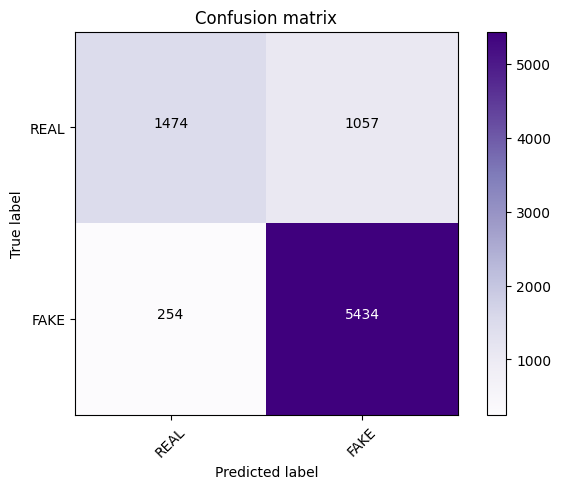

In [5]:
#training
clf.fit(X_train, Y_train)

#testing
prediction2 = clf.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction2)

cm1 = metrics.confusion_matrix(Y_test, prediction2)
plot_confusion_matrix(cm1, classes=['REAL', 'FAKE'])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("accuracy_scores" ,accuracy_score(Y_test, prediction2))
print ("precision_scores", precision_score(Y_test, prediction2, pos_label=1))
print ("recall_scores", recall_score(Y_test, prediction2, pos_label=1))
print ("f1_scores", f1_score(Y_test, prediction2, pos_label=1))

In [9]:
sample = ['this is totally a lie']
s = vectorizer.transform(sample)
print(clf.predict(s))

[1]
